Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load Dataset winequalityN.csv

In [2]:
data = pd.read_csv('winequalityN.csv')

Explore Dataset

In [3]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Data Visualisation - Plotting the Distribution of House Prices

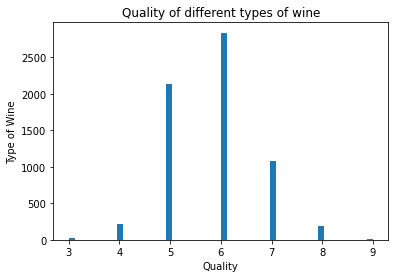

In [4]:
plt.hist(data['quality'], bins=50)
plt.xlabel('Quality')
plt.ylabel('Type of Wine')
plt.title('Quality of different types of wine')
plt.show()

Plotting the Correlation Between House Price and Other Features

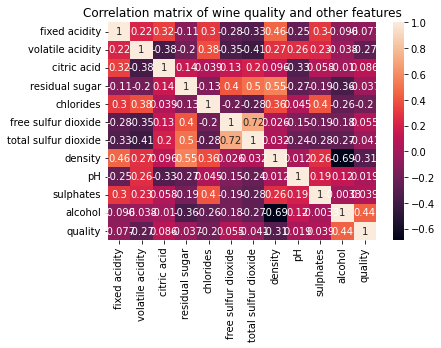

In [5]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix of wine quality and other features')
plt.show()

Data Preparation - Splitting data

In [6]:
x = data[['fixed acidity','volatile acidity']]
y = data['quality']
m = ~(np.isnan(x).any(axis=1) | np.isnan(y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train, y_train, x_test, y_test = x_train[m], y_train[m], x_test[m], y_test[m]


C:\Users\arath\AppData\Local\Temp\ipykernel_59140\2657554757.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_train, y_train, x_test, y_test = x_train[m], y_train[m], x_test[m], y_test[m]


Creating Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Make Predictions on the Testing Set

In [8]:
y_pred = model.predict(x_test)

Evaluate the Model Performance

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.6493983076155351
R-squared: 0.0807201633312905
